This notebook shows the scoring metrics working on the toy dataset after the split with the popular recommender

In [1]:
from hmcollab import datasets
from hmcollab import models
from hmcollab import scoring
from hmcollab.directory_tree import HMDatasetDirectoryTree
from hmcollab import directories
from display_data import display_articles

In [3]:

import warnings
warnings.filterwarnings("ignore")

### Toy dataset: Two sets

In [7]:
tree = HMDatasetDirectoryTree(base=directories.data("toy_orig"))     # (10000, 7)
toy = datasets.HMDatasetTwoSets(tree=tree)

# toy_tree = HMDatasetDirectoryTree(directories.data("toy"))
# toy = datasets.HMDataset(tree=toy_tree, folds="twosets")
print('Transactions shape: ', toy.transactions.shape)
print('Unique customers: ',toy.transactions.customer_id.unique().shape)

Transactions shape:  (252406, 5)
Unique customers:  (10899,)


In [8]:
print(toy.__dict__.keys())

dict_keys(['tree', 'articles', 'customers', 'transactions', 'transactions_x', 'transactions_y', 'relevant_set', 'train_x', 'test_x', 'train_y', 'test_y'])


In [9]:
print('train_x shape: ', toy.train_x.shape)
print('train_y shape: ', toy.train_y.shape)
print('test_x shape: ', toy.test_x.shape)
print('test_y shape: ', toy.test_y.shape)

train_x shape:  (197978, 5)
train_y shape:  (1603, 5)
test_x shape:  (52393, 5)
test_y shape:  (432, 5)


In [10]:
toy_target = datasets.Target(toy.transactions)
print('x: ', toy_target.transactions_x.shape)
print('y: ', toy_target.transactions_y.shape)
print('Relevant: ', toy_target.relevant_set.shape)

x:  (250371, 5)
y:  (2035, 5)
Relevant:  (578, 2)


### Popular Recommender

In [11]:
# Here we use train_x within the class
recommender = models.PopularRecommender(toy, total_recommendations=12,)

In [12]:
full_12 = recommender.recommend()
full_12

['0706016001',
 '0706016002',
 '0610776002',
 '0372860001',
 '0464297007',
 '0610776001',
 '0759871002',
 '0372860002',
 '0160442007',
 '0399223001',
 '0706016003',
 '0562245001']

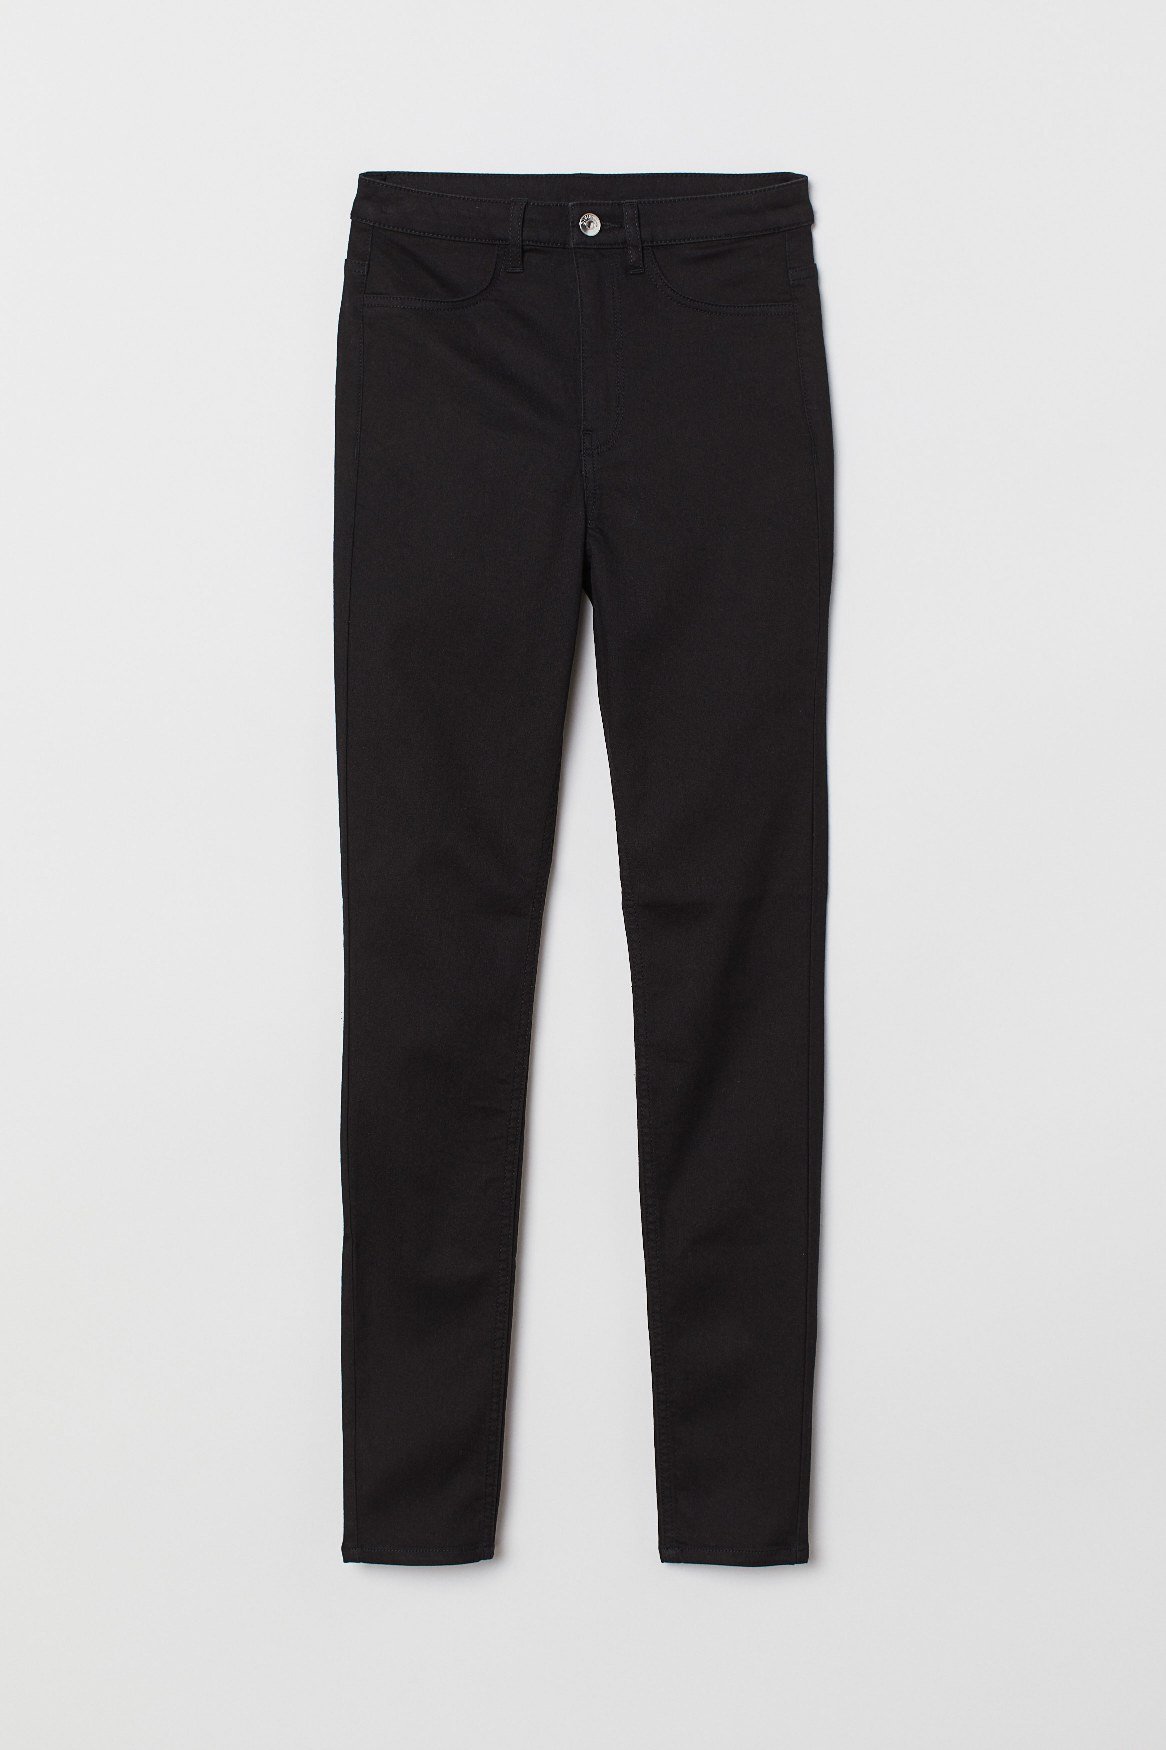

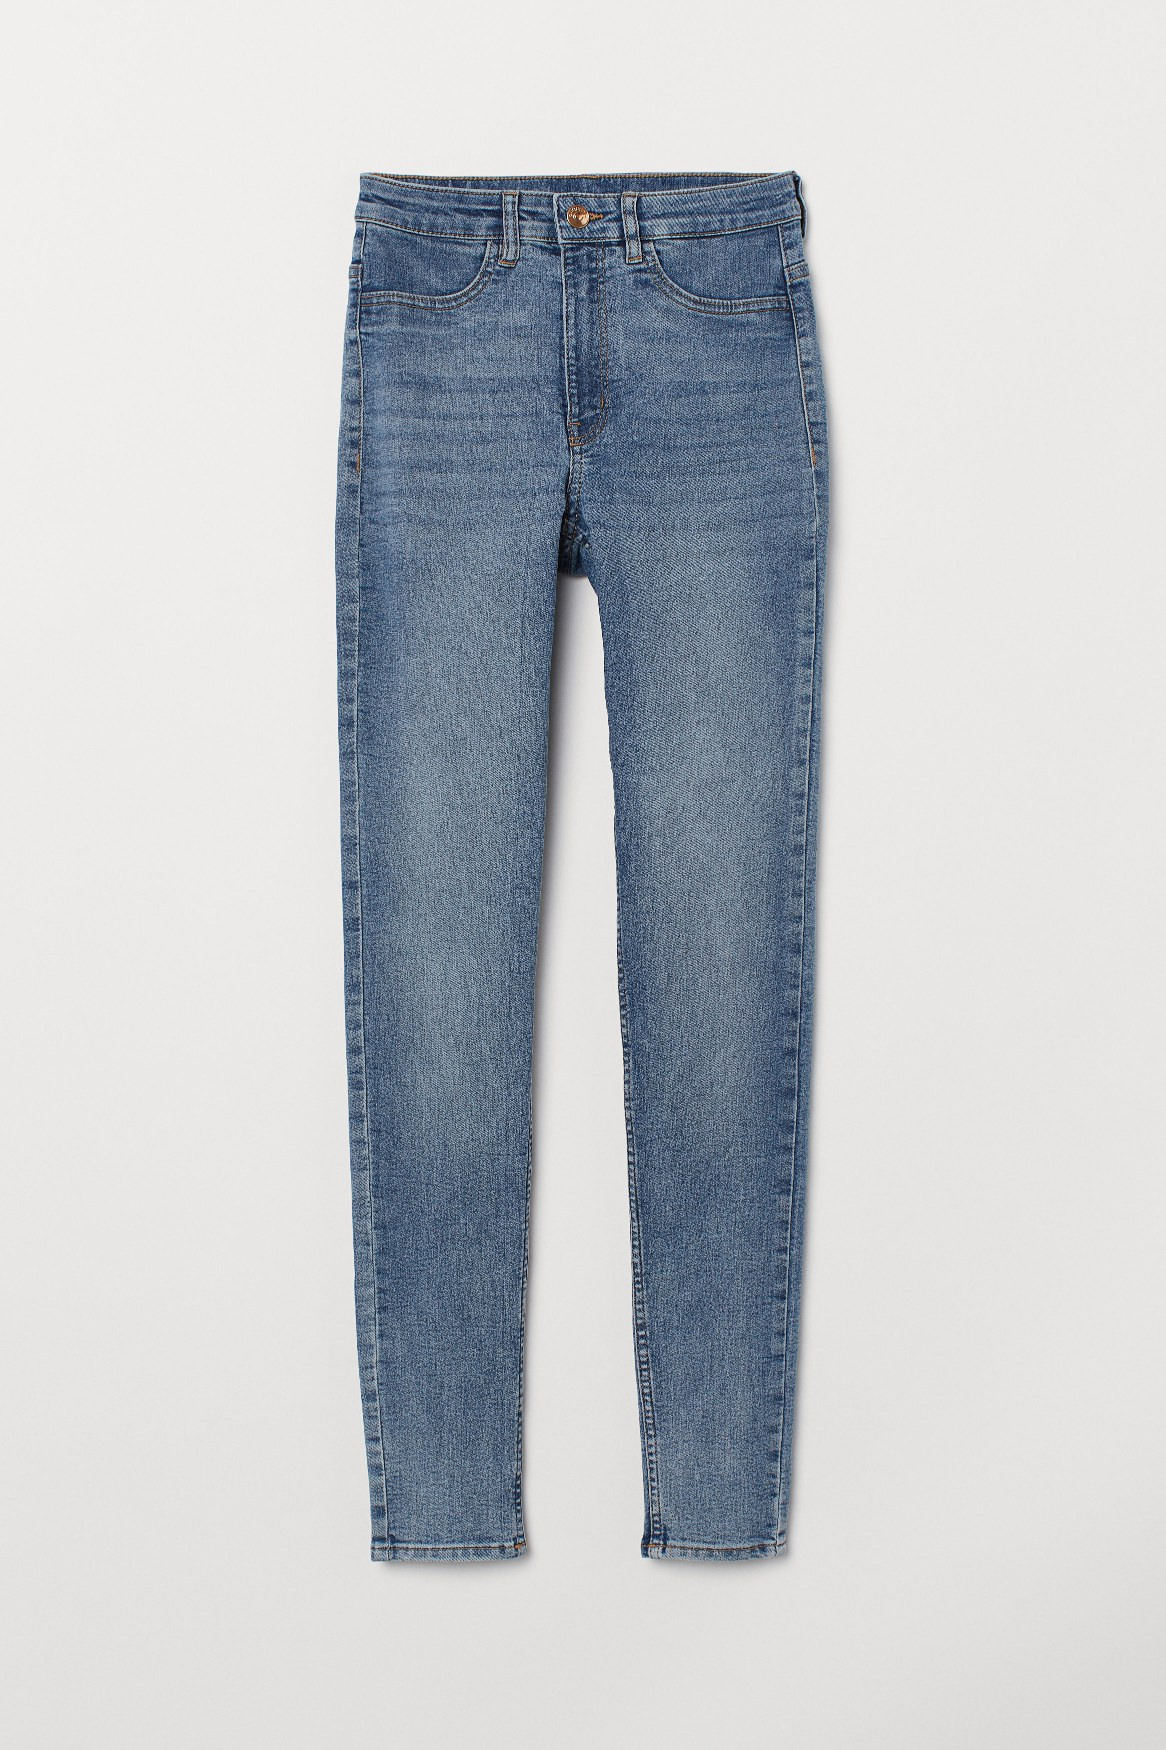

/Users/gina/Desktop/Gina/MachineLearning/Proyectos/HM/HM-clothing-project/data/images/061/0610776002.jpg does not exist


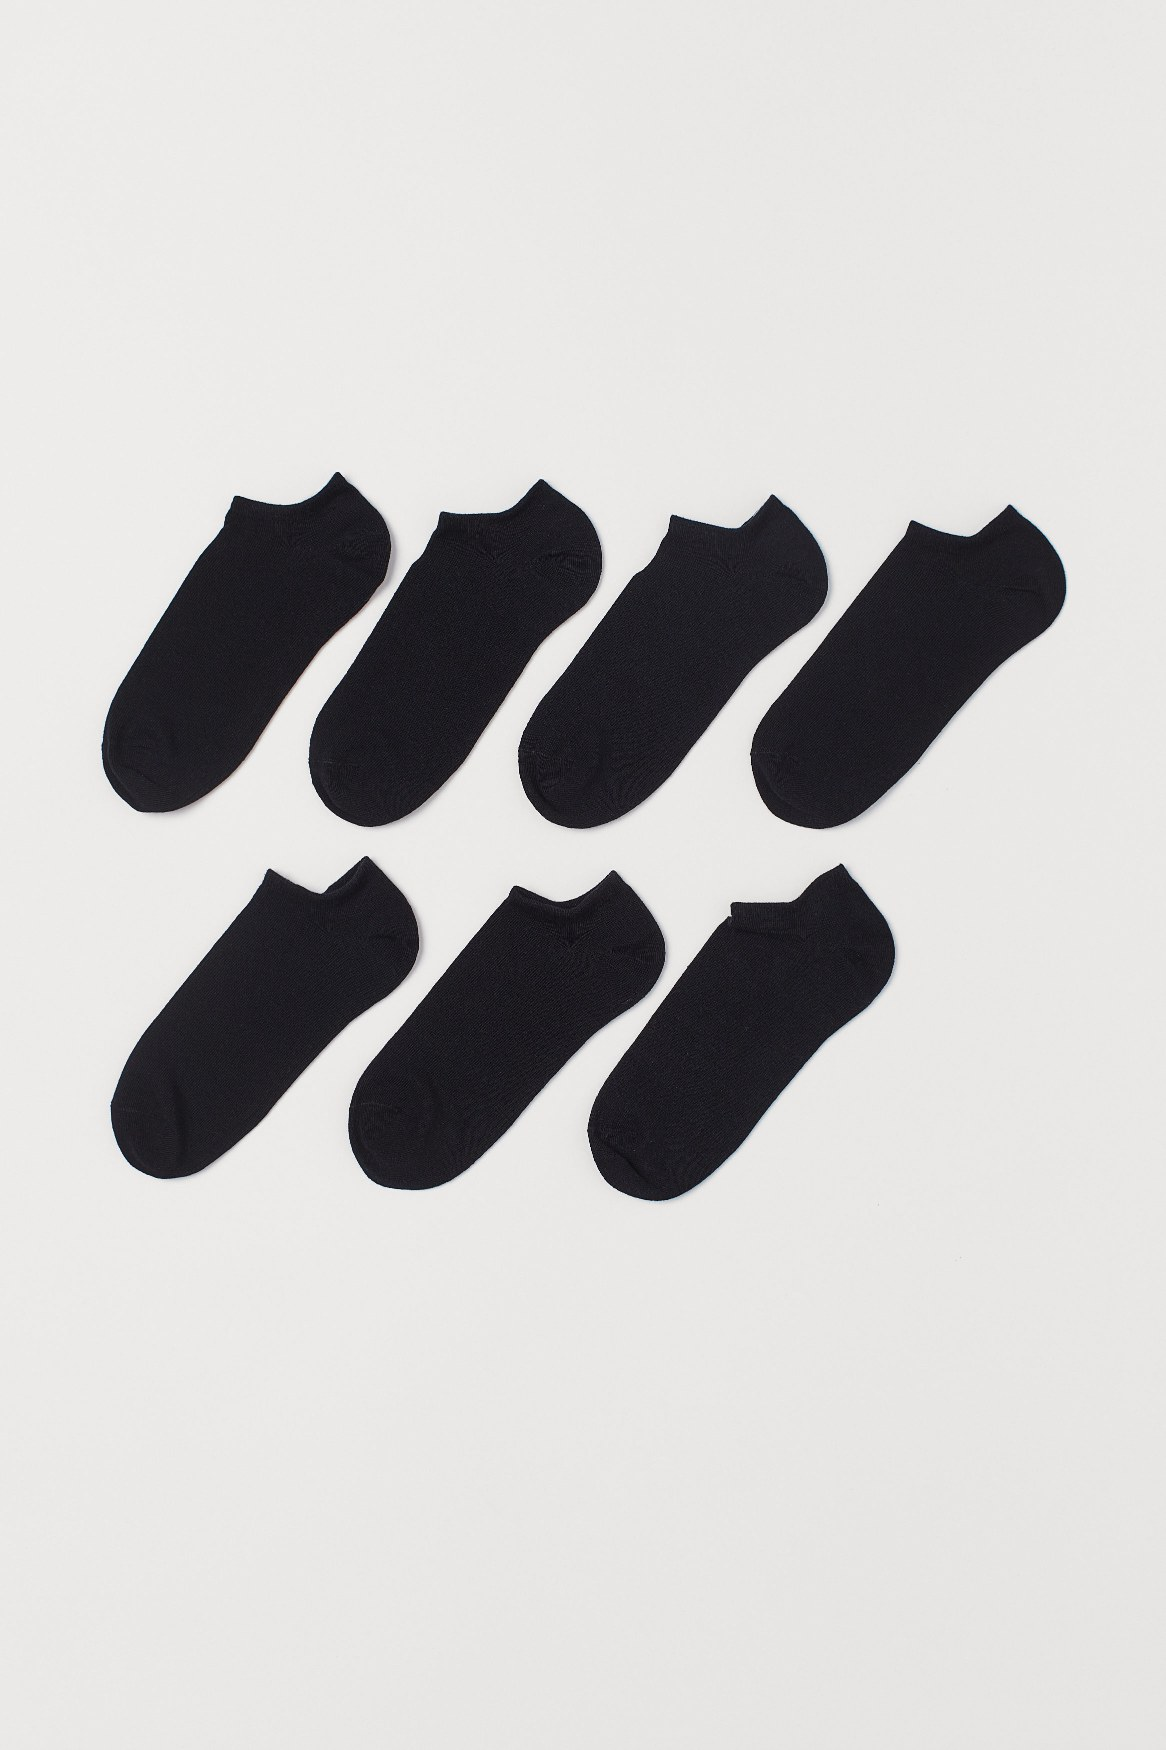

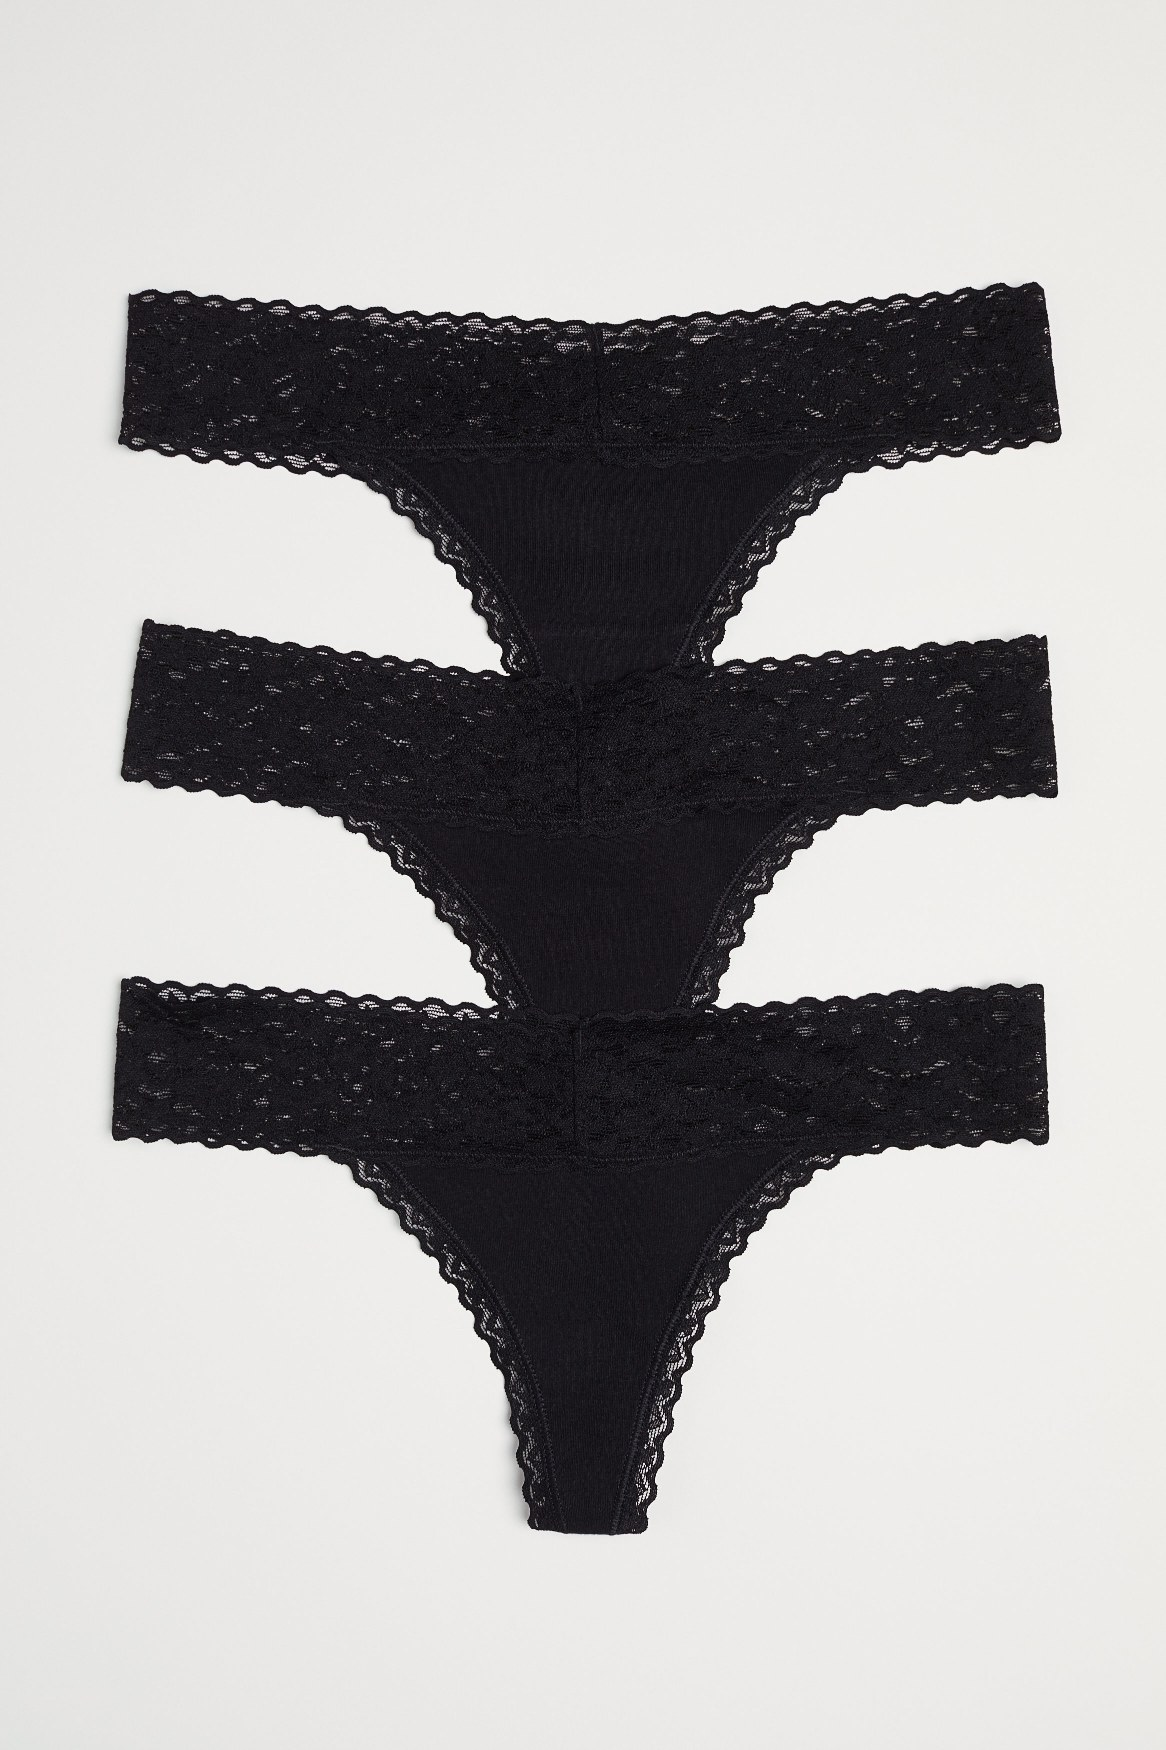

/Users/gina/Desktop/Gina/MachineLearning/Proyectos/HM/HM-clothing-project/data/images/061/0610776001.jpg does not exist


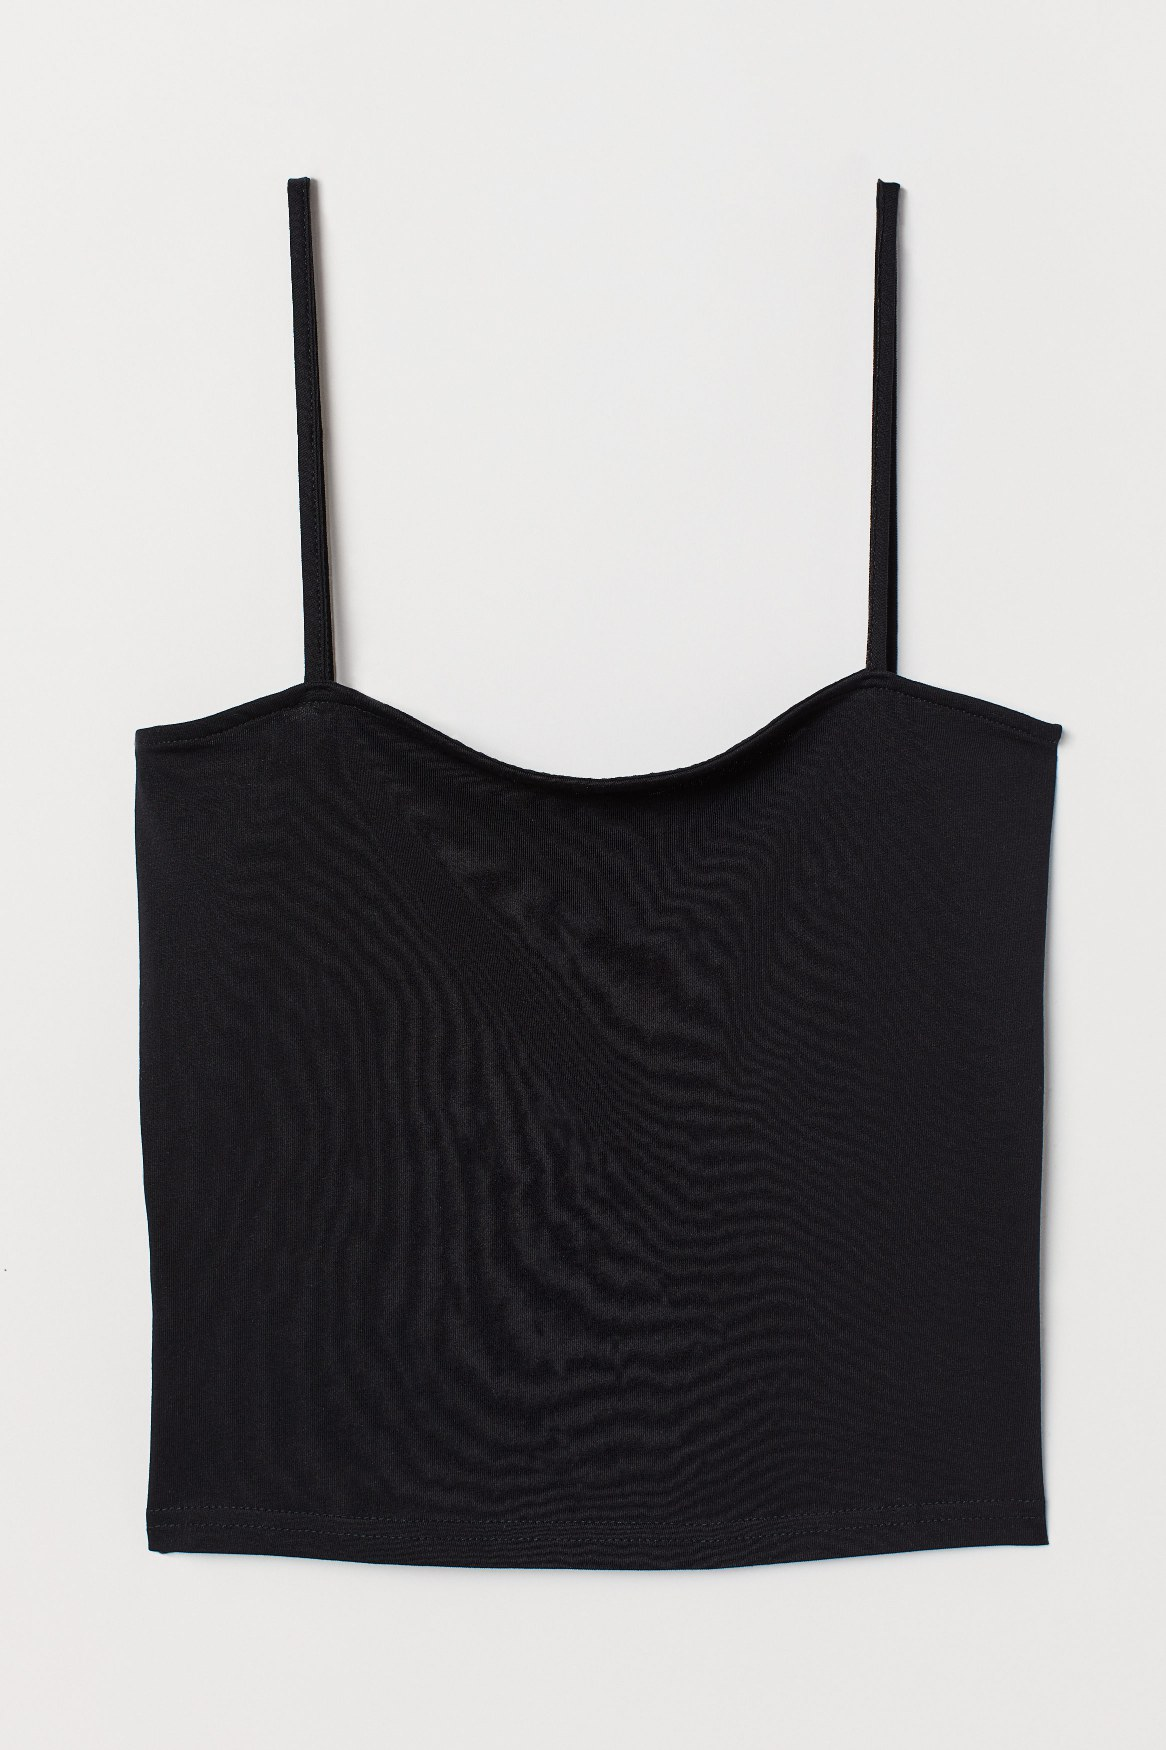

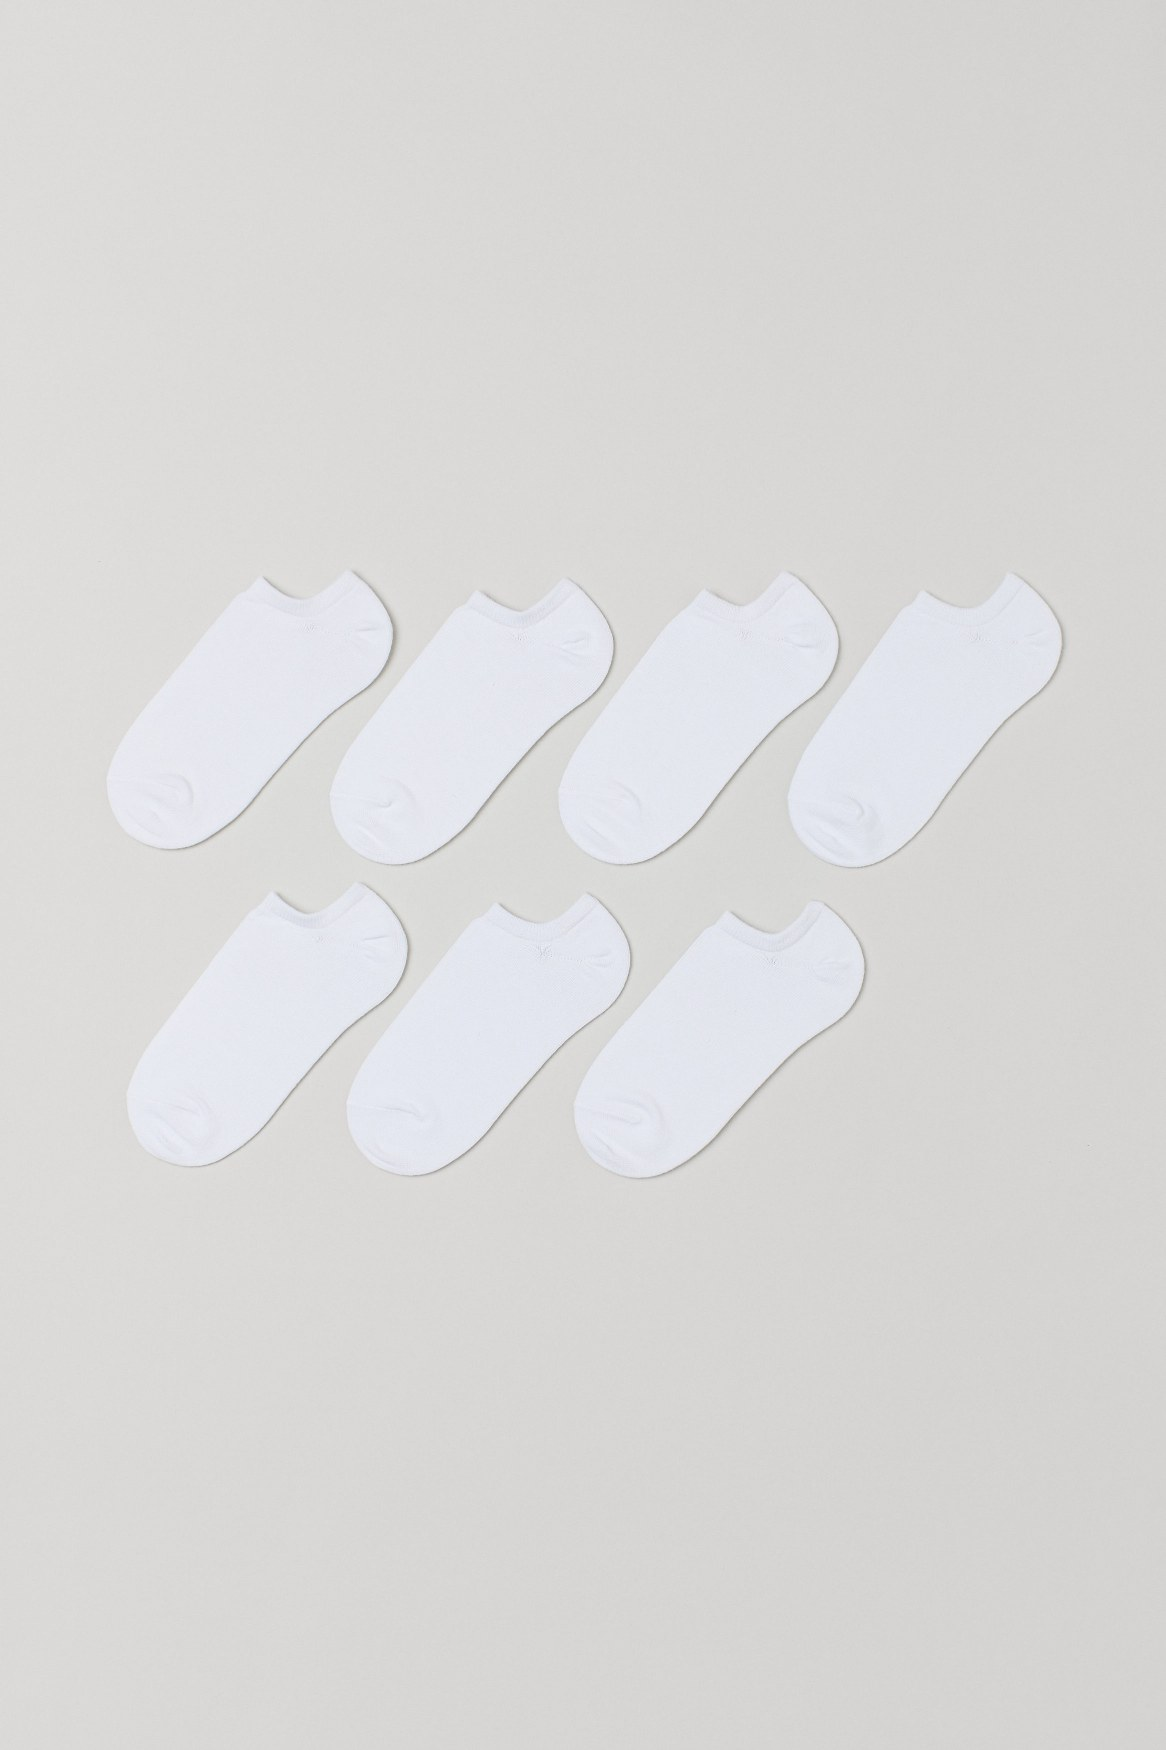

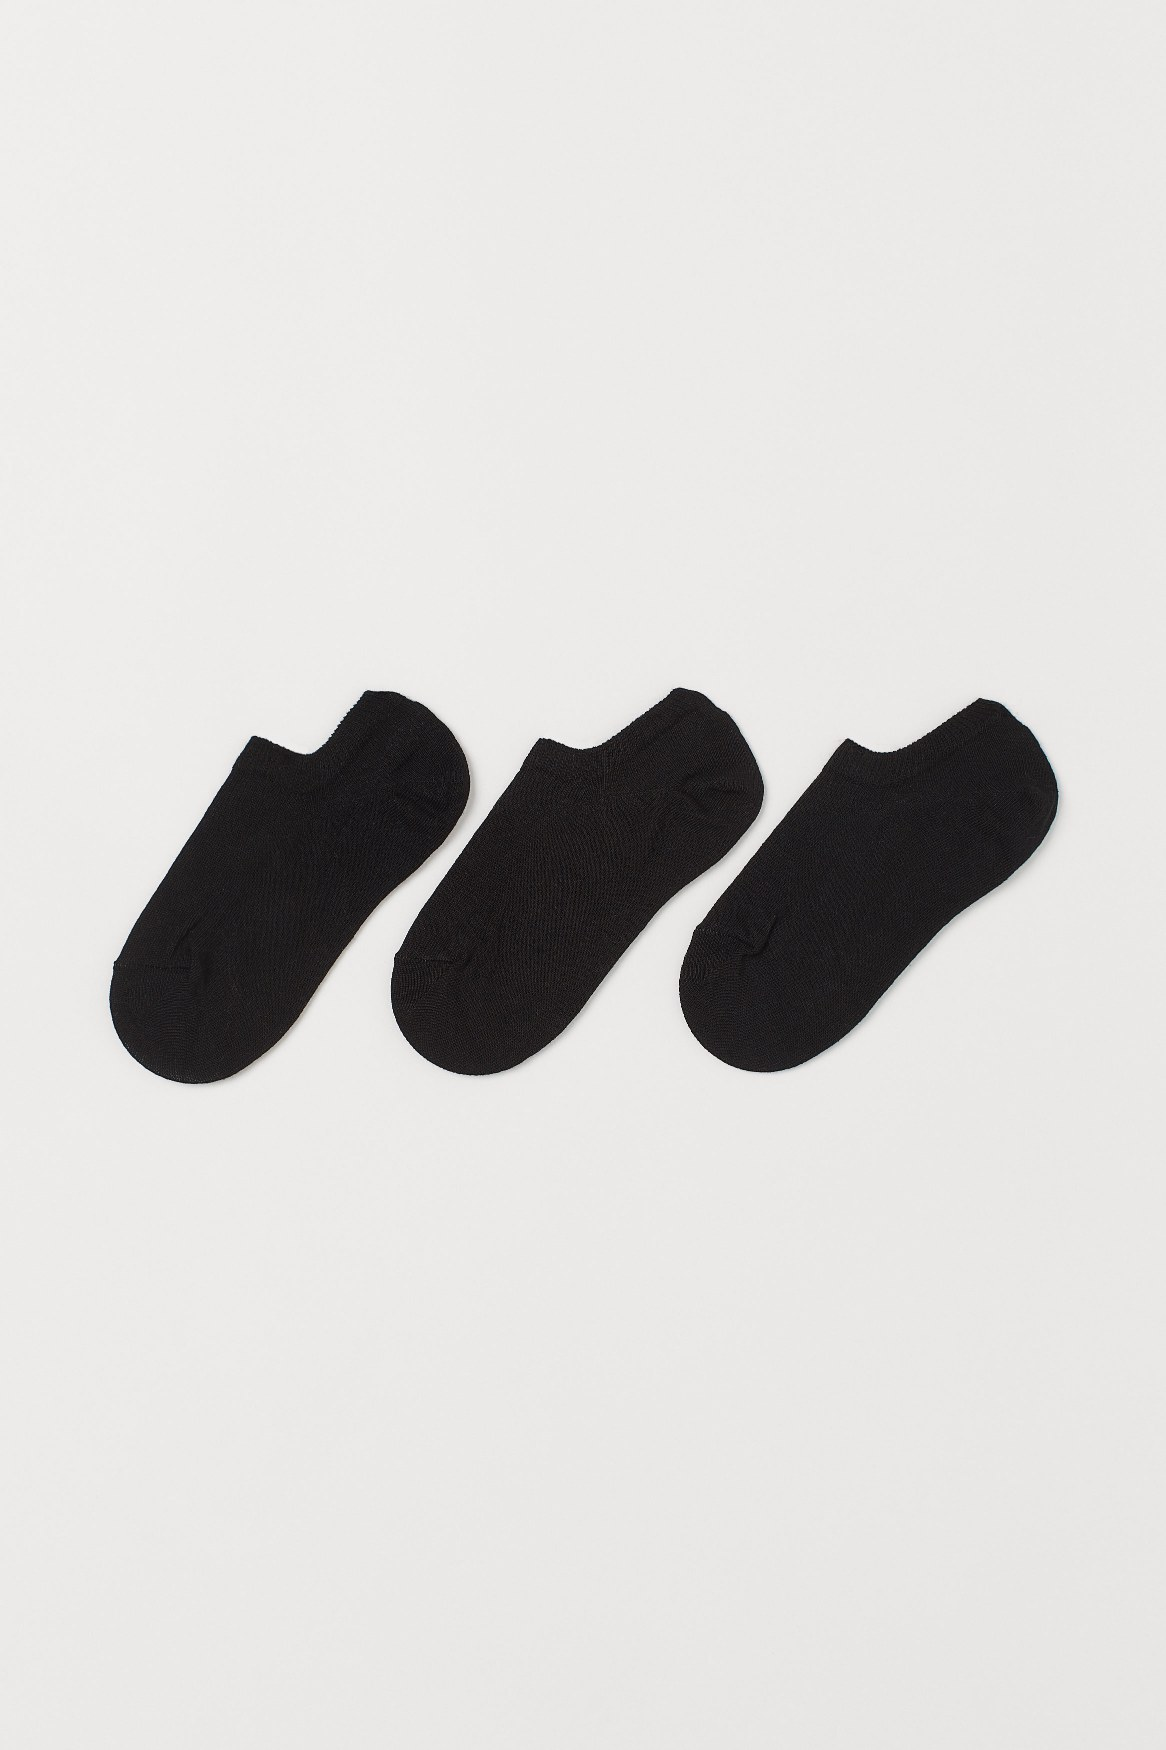

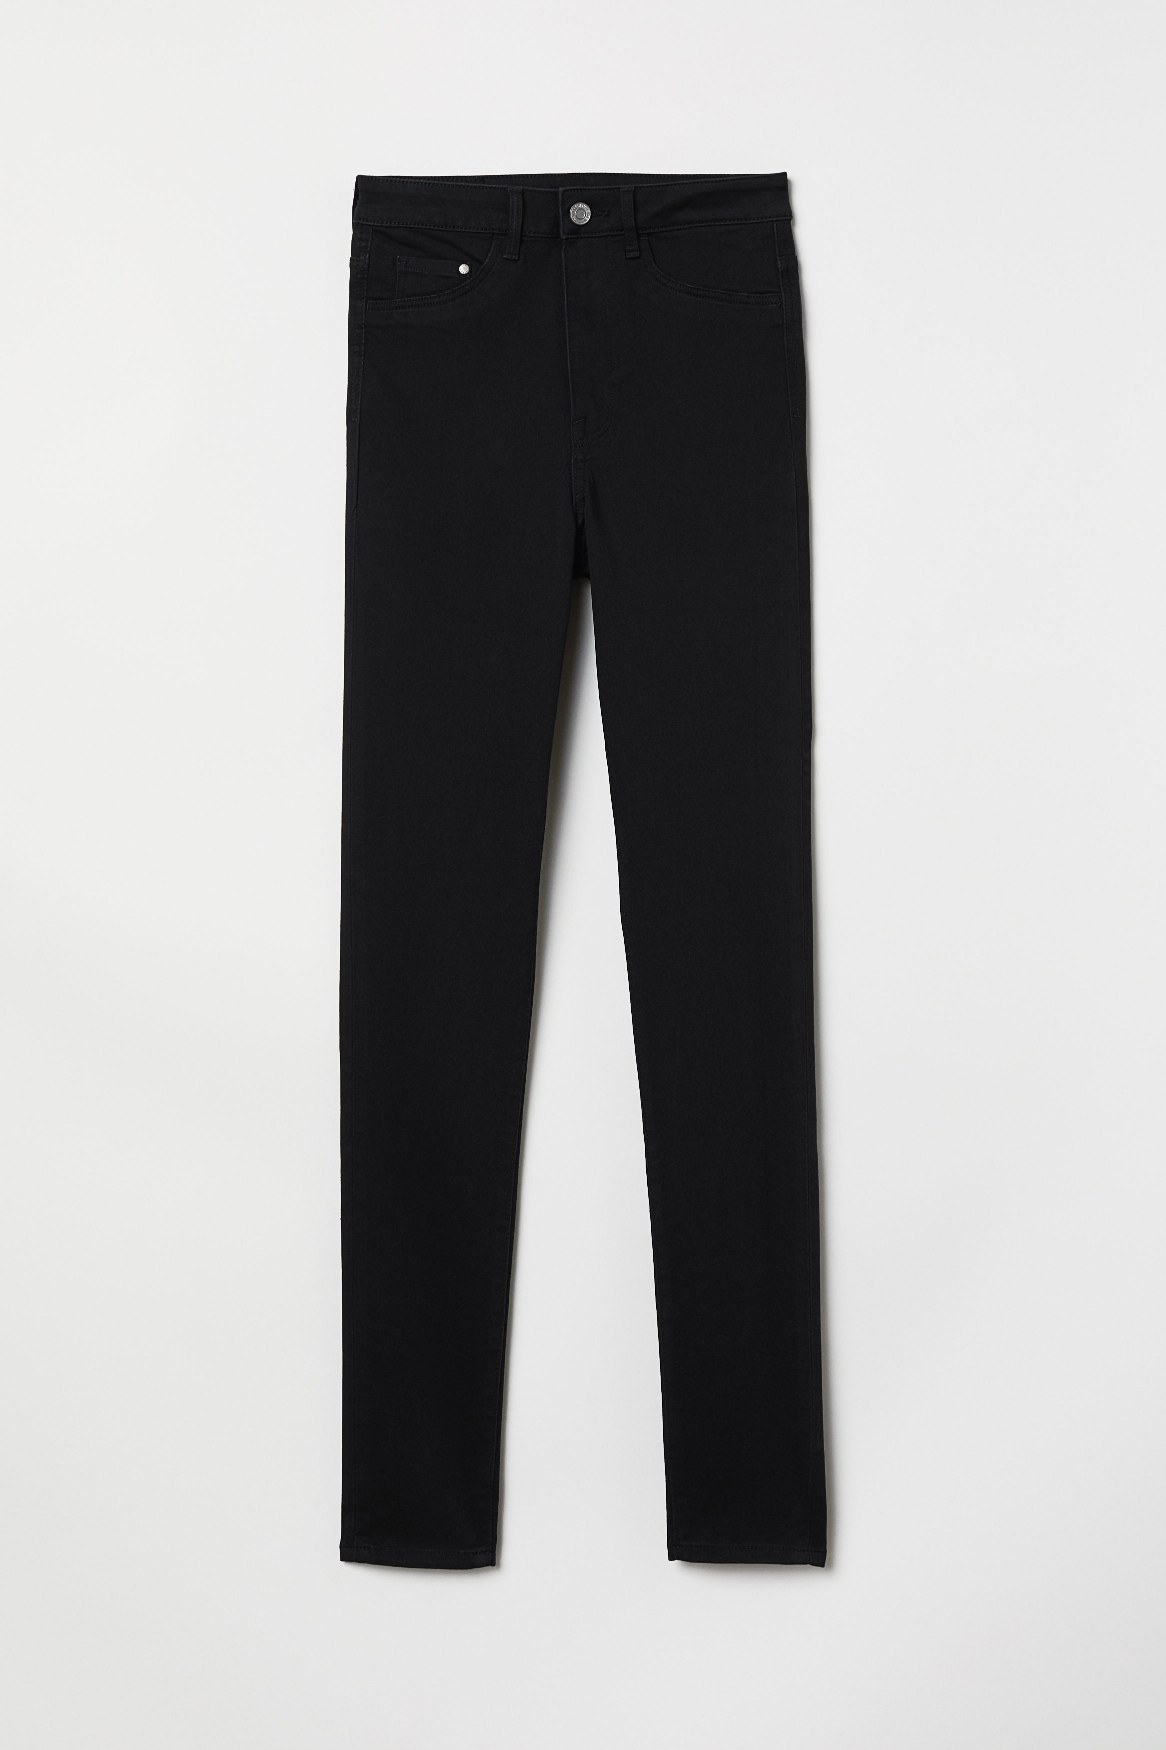

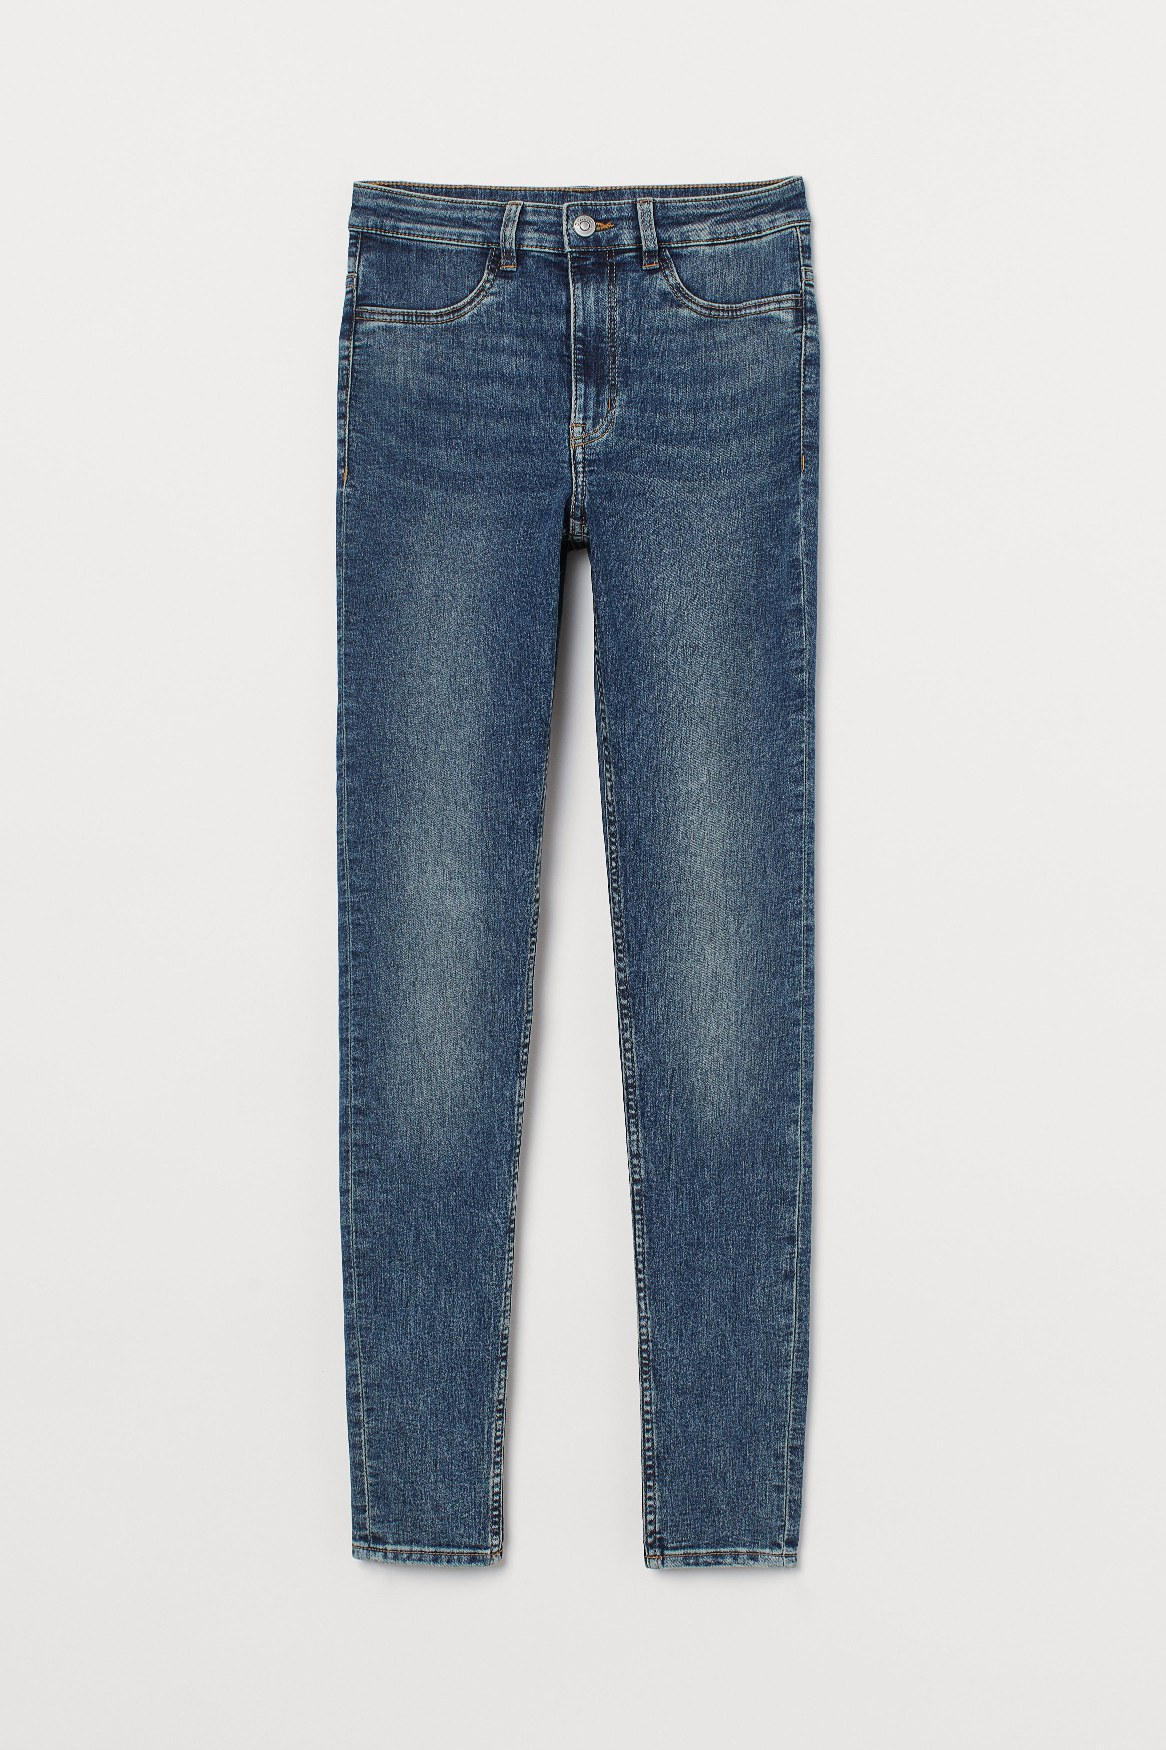

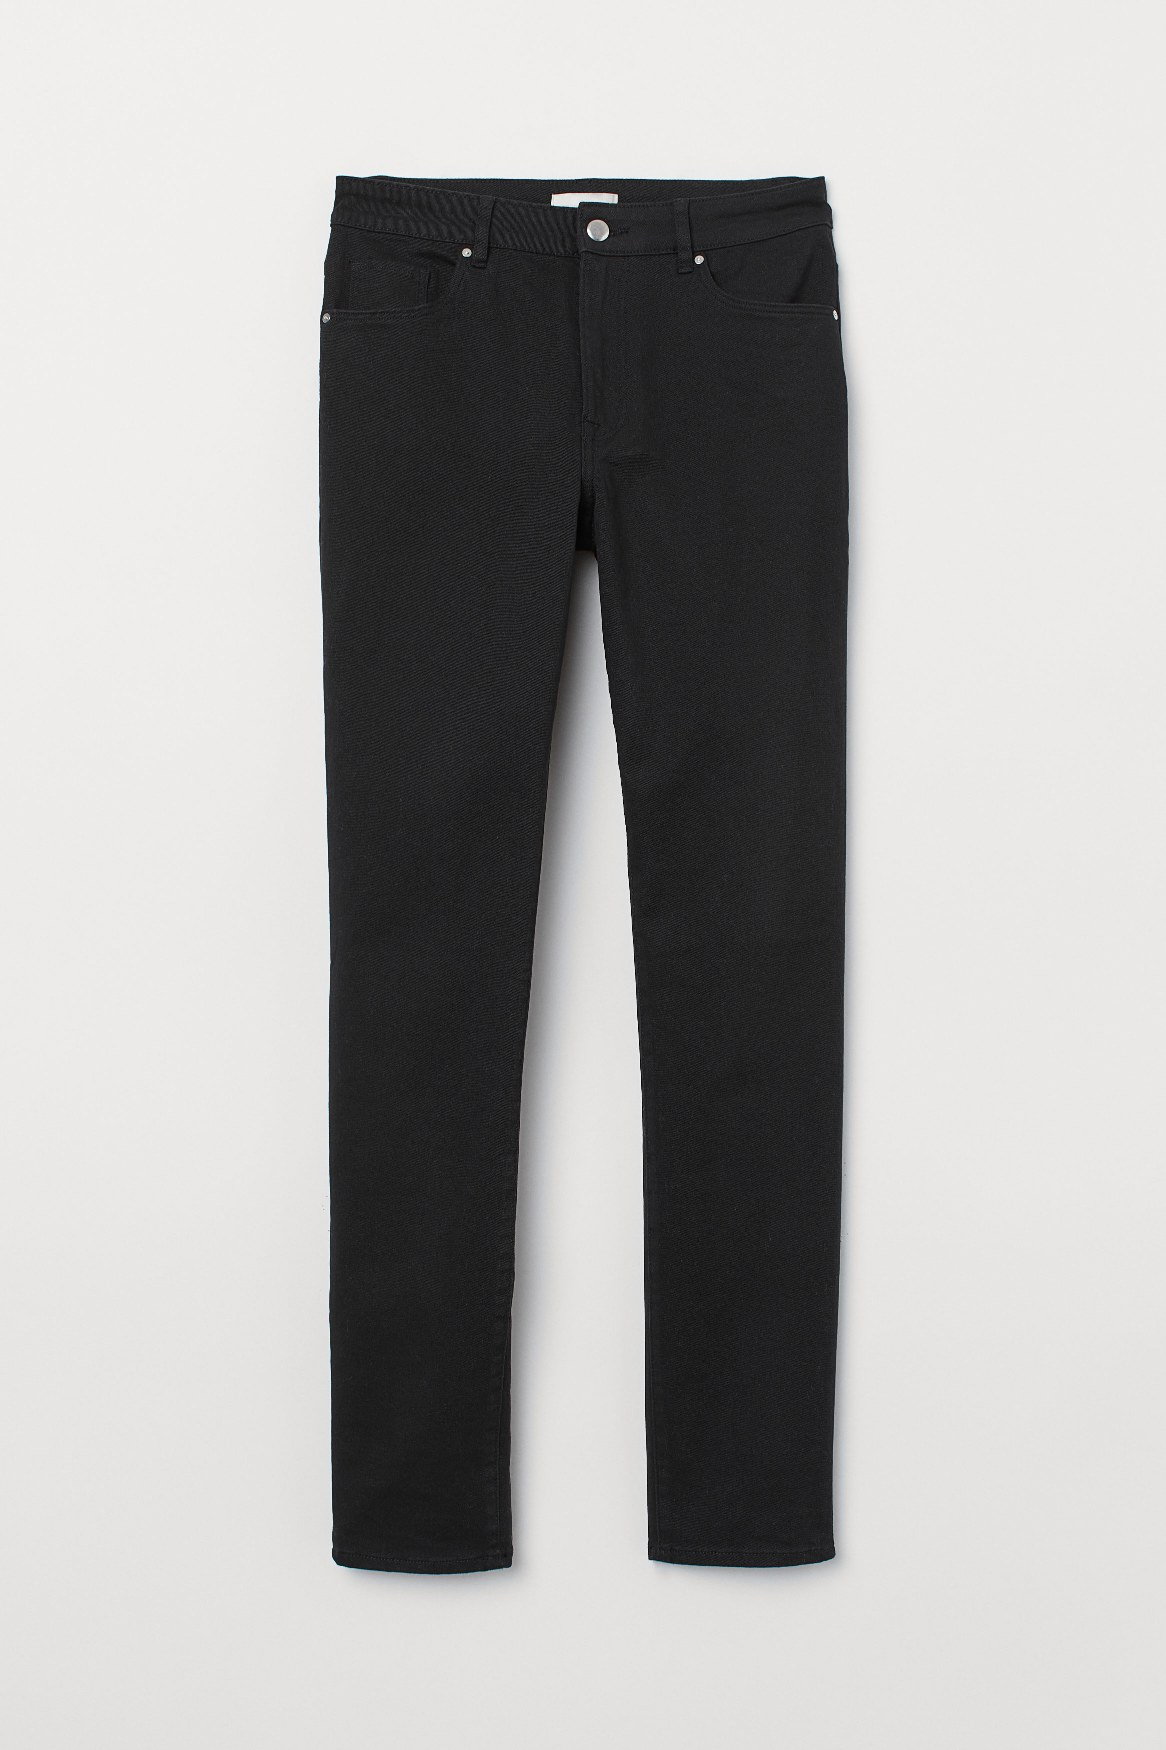

In [13]:
# GG sep20,2023, we need to prune the images!
display_articles(toy, full_12)  

In [14]:
print('toy.train_x unique customers: ', toy.train_x.customer_id.unique().shape[0])
train_recommended = recommender.recommend_all(toy.train_x.customer_id.unique())
train_recommended.head()

toy.train_x unique customers:  8691


,customer_id,prediction
0,0864c58e052b243273d2ab33df294f8e03e9299f84a925...,0706016001 0706016002 0610776002 0372860001 04...
1,090d64e1a38b1732c5464a1e67bdc2b77a73075bc3c427...,0706016001 0706016002 0610776002 0372860001 04...
2,0e129e8643d295d3f00e0d57f55d7d8dff13b82592f590...,0706016001 0706016002 0610776002 0372860001 04...
3,0e7adb227657cb54524f815440a73d5cebf3da3871dbdc...,0706016001 0706016002 0610776002 0372860001 04...
4,0fc6a8c1b87b5a2fbdc64eb9d3d11d246ee55a22f408d1...,0706016001 0706016002 0610776002 0372860001 04...


In [15]:
toy_bool = scoring.relevant(train_recommended, toy_target.relevant_set)
toy_bool.head()

0    [False, False, False, False, False, False, Fal...
1    [False, False, False, False, False, False, Fal...
2    [False, False, False, False, False, False, Fal...
3    [False, False, False, False, False, False, Fal...
4    [False, False, False, False, False, False, Fal...
dtype: object

In [16]:
print('precision at {} for the first customer: {}'.format(len(toy_bool[0]), scoring.precision_at_k(toy_bool[0][: len(toy_bool[0]) + 1])))
print('ap_at_k for the first customer:', scoring.ap_at_k(toy_bool[0]))
print('map_at_k:', scoring.map_at_k(toy_bool))

precision at 12 for the first customer: 0.0
ap_at_k for the first customer: 0.0
map_at_k: 0.00023680461032706893
